In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 24,
          'figure.figsize': (8, 8),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params) 

from scipy.optimize  import fsolve, root

In [11]:
## Ejemplo, transferencia de diodo
mydiode            = {} 
mydiode['1N4148'] =  [2.52e-9,1.72,0.56,25e-3] #Is,n,Rs
mydiode['1N5817'] =  (  31e-6,1.37,0.50,25e-3) #Is,n,Rs


def IDT(x, *data):
    VD,diode = data
    IS = diode[0]
    n  = diode[1]
    Rs = diode[2]
    vt = diode[3]
    return IS* np.exp((VD - x*Rs)/(n*vt))- x

vgo = np.arange(0,1.2,0.01)

ido = [ fsolve( IDT, [0.1], args=(vg,mydiode['1N5817']))[0] for vg in vgo]

ida = [ fsolve( IDT, [0.1], args=(vg,mydiode['1N4148']))[0] for vg in vgo]



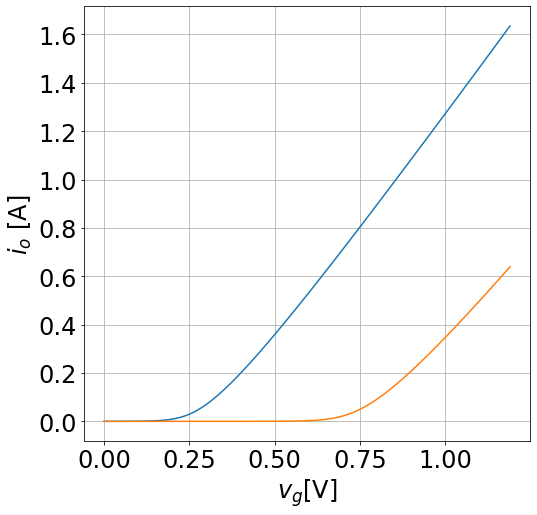

In [13]:
plt.plot(vgo, ido)
plt.plot(vgo, ida)
plt.ylabel('$i_{o}$ [A]')
plt.xlabel('$v_g$[V]')
#plt.ylim(0, Ic*1.5)
plt.grid()
plt.show()
